# Question 2 Medical Insurance

In [89]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from  sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [4]:
insurance=pd.read_csv('medical_insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
insurance.shape

(1338, 7)

In [8]:
insurance.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [13]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


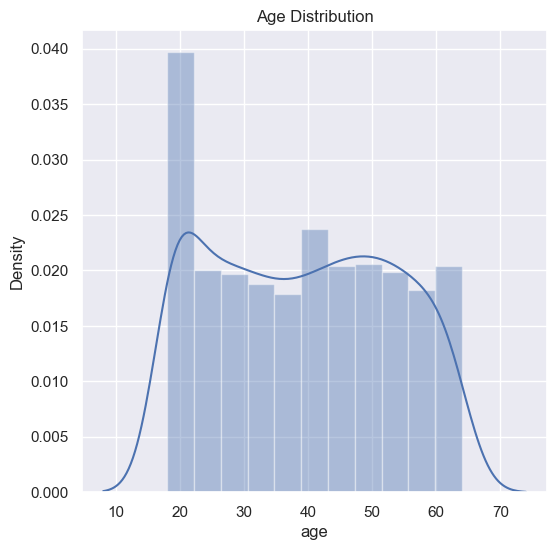

In [16]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['age'])
plt.title('Age Distribution')
plt.show()

In [17]:
insurance['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

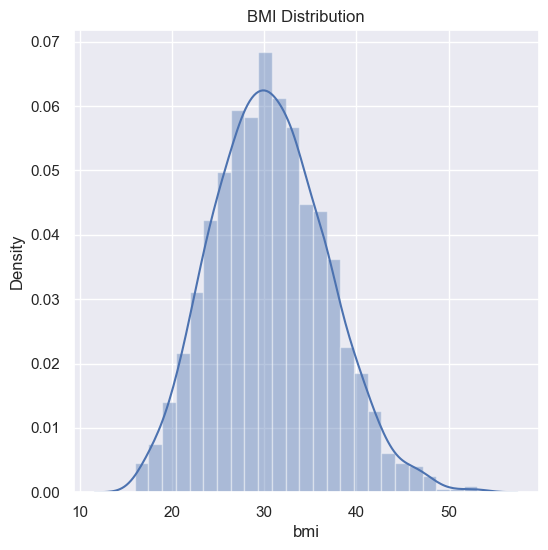

In [20]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['bmi'])
plt.title('BMI Distribution')
plt.show()

In [23]:
insurance['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

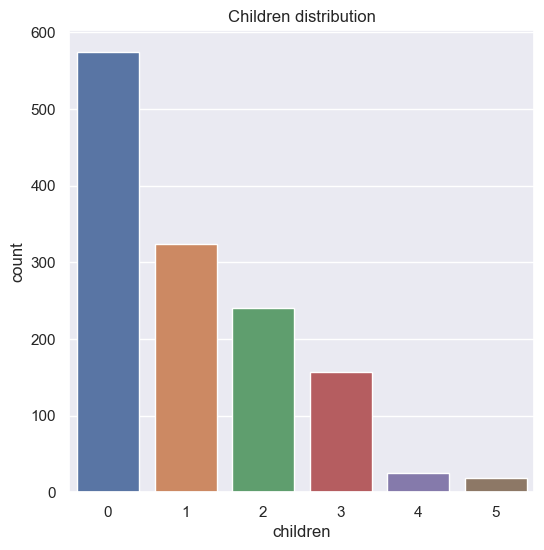

In [27]:
plt.figure(figsize=(6,6))
sns.countplot(x='children',data=insurance)
plt.title('Children distribution')
plt.show()

from this 574 people have no children.

In [28]:
insurance['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

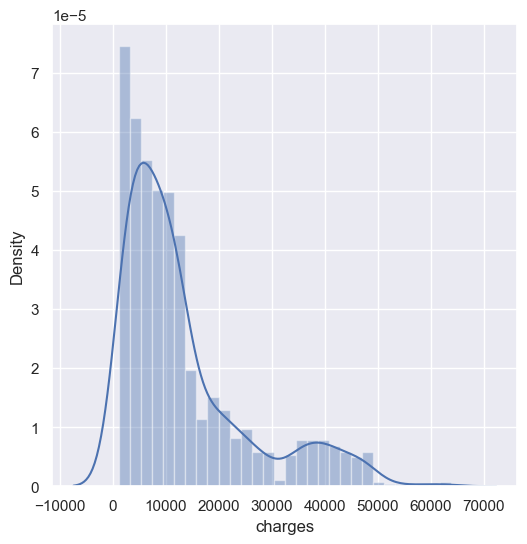

In [31]:
sns.set()
plt.figure(figsize=(6,6))
sns.distplot(insurance['charges'])
plt.show()

most of the charges are distributed from the range of 10000 to 20000 

In [42]:
insurance.replace({'sex':{'male':0,'female':1}},inplace=True)
insurance.replace({'smoker':{'yes':0,'no':1}},inplace=True)
insurance.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}},inplace=True)

In [43]:
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3,10600.54830
1334,18,1,31.920,0,1,2,2205.98080
1335,18,1,36.850,0,1,0,1629.83350
1336,21,1,25.800,0,1,1,2007.94500


In [44]:
x=insurance.iloc[:,0:-1]
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,0,1
1,18,0,33.770,1,1,0
2,28,0,33.000,3,1,0
3,33,0,22.705,0,1,3
4,32,0,28.880,0,1,3
...,...,...,...,...,...,...
1333,50,0,30.970,3,1,3
1334,18,1,31.920,0,1,2
1335,18,1,36.850,0,1,0
1336,21,1,25.800,0,1,1


In [46]:
y=insurance.iloc[:,-1]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.20,random_state=2)

In [61]:
x_train.shape

(267, 6)

In [62]:
y_train.shape

(267,)

In [63]:
x_test.shape

(1071, 6)

In [64]:
y_test.shape

(1071,)

In [67]:
lgsinsurance=LinearRegression()

In [68]:
lgsinsurance.fit(x_train,y_train)

LinearRegression()

In [77]:
pred=lgsinsurance.predict(x_train)
pred

array([ 6784.14639786, 17829.66612464,  9756.86678845, 16409.69364468,
       13380.91519058,  9351.52615236, 14561.07775771,  4860.8915335 ,
       30792.11541648,  7002.13014074, 30437.84622522, 29137.02579357,
        9682.35366151,  6919.10095836,  2276.54676516, 28065.28376366,
        5749.67705525,  8508.48470249,  7036.81125924, 11783.66775759,
        9607.28948984,  6853.13321358,  8213.319027  , 27770.74749513,
        2398.22758259,  6136.28357607,  8888.67010595,  2286.8916967 ,
        2005.89427654, 32652.49976791,  6584.91517129, 11013.64280652,
       27610.45234551, 30859.16181481, 13272.9432624 ,  7885.12086991,
        9208.45576862,  8431.83169384, 10794.53497865, 23555.24087289,
       34118.73745737, 10852.95764413, 13867.47571651, 14267.61672105,
       36345.51335282, 24557.37093327,  9333.86559861,  5390.54430745,
        8665.8986711 , 21060.82079534, 10776.90487699, 35196.58762741,
       13630.79025572, 11317.5940074 , 29822.139286  ,  7991.48462865,
      

In [82]:
r2=metrics.r2_score(y_train,pred)
print('R^2 score',r2)

R^2 score 0.7033757537232996


In [83]:
pred_test=lgsinsurance.predict(x_test)
pred_test

array([ 2140.83630972, 11580.7600913 , 10438.72023524, ...,
        9804.38745007,   -66.38766163,  4917.47445436])

In [86]:
r2_test=metrics.r2_score(y_test,pred_test)
print('R^2 score',r2_test)

R^2 score 0.7428411411721499


In [87]:
#now we will take a random value and see the prediction

In [91]:
input_data=(56,1,39.82,0,1,0)
input_array=np.asarray(input_data)
input_array_reshaped=input_array.reshape(1,-1)
prediction=lgsinsurance.predict(input_array_reshaped)
print(prediction)

[14260.75787055]


Hence the prediction is Giving almost equal 